In [2]:
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Importar la Base de datos, consiste en los precios de SPY, SPYV y SPY y los valores de P/E y el BEst P/E desde 2001 hasta enero de 2023.
df = pd.read_excel(r"C:\Users\stefa\OneDrive\Desktop\FARO\VyG\data.xlsx")
df = df.set_index('Date')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\stefa\\OneDrive\\Desktop\\FARO\\VyG\\data.xlsx'

In [20]:
import numpy as np
import numpy as np 
j = np.linspace(2, 4, 5) 
j


array([2. , 2.5, 3. , 3.5, 4. ])

In [2]:
df['PE_CHANGE'] = df['PE'].pct_change()
df['BEST_PE_CHANGE'] = df['BEST PE'].pct_change() 
df['SPY_RETURNS'] = df['SPY'].pct_change()
df['SPYV_RETURNS'] = df['SPYV'].pct_change()
df['SPYG_RETURNS'] = df['SPYG'].pct_change()
df['BEST_PE_CHANGE_MA20'] = df['BEST_PE_CHANGE'].rolling(window=20).mean()

In [3]:
df['RETURNS'] = [0.0] * len(df.index)

df = df.loc[df.index >= '2001-04-11']


for i in range(1,5484) :
    if df['BEST_PE_CHANGE_MA20'][i-1] > 0.00055:
        df['RETURNS'][i] = df['SPYV_RETURNS'][i] 
    else:
        df['RETURNS'][i] = df['SPYG_RETURNS'][i] 


spy_investment = 100 * (1 + df['SPY_RETURNS']).cumprod()
spyv_investment = 100 * (1 + df['SPYV_RETURNS']).cumprod()
spyg_investment = 100 * (1 + df['SPYG_RETURNS']).cumprod()
strategy_investment = 100 * (1 + df['RETURNS']).cumprod()

print("Value of $100 investment in SPY:", spy_investment.iloc[-1])
print("Value of $100 investment in SPYV:", spyv_investment.iloc[-1])
print("Value of $100 investment in SPYG:", spyg_investment.iloc[-1])
print("Value of $100 investment in Strategy:", strategy_investment.iloc[-1])

# Calculate average returns
spy_average_return = df['SPY_RETURNS'].mean()
spyv_average_return = df['SPYV_RETURNS'].mean()
spyg_average_return = df['SPYG_RETURNS'].mean()
strategy_average_return = df['RETURNS'].mean()

# Calculate standard deviation
spy_std = df['SPY_RETURNS'].std()
spyv_std = df['SPYV_RETURNS'].std()
spyg_std = df['SPYG_RETURNS'].std()
strategy_std = df['RETURNS'].std()

# Calculate sharpe ratio
spy_sharpe = (spy_average_return / spy_std)
spyv_sharpe = (spyv_average_return / spyv_std)
spyg_sharpe = (spyg_average_return / spyg_std)
strategy_sharpe = (strategy_average_return / strategy_std)

# Put the results in a small dataframe
results = pd.DataFrame({'Average Return': [spy_average_return, spyv_average_return, spyg_average_return, strategy_average_return],
                       'Standard Deviation': [spy_std, spyv_std, spyg_std, strategy_std],
                       'Sharpe Ratio': [spy_sharpe, spyv_sharpe, spyg_sharpe, strategy_sharpe]},
                      index=['SPY', 'SPYV', 'SPYG', 'Strategy'])

print(results)

Value of $100 investment in SPY: 347.77539648521315
Value of $100 investment in SPYV: 246.07650299201867
Value of $100 investment in SPYG: 332.34108527131644
Value of $100 investment in Strategy: 1220.1832543679377
          Average Return  Standard Deviation  Sharpe Ratio
SPY             0.000303            0.012330      0.024605
SPYV            0.000239            0.012217      0.019570
SPYG            0.000309            0.013423      0.023042
Strategy        0.000541            0.013047      0.041501


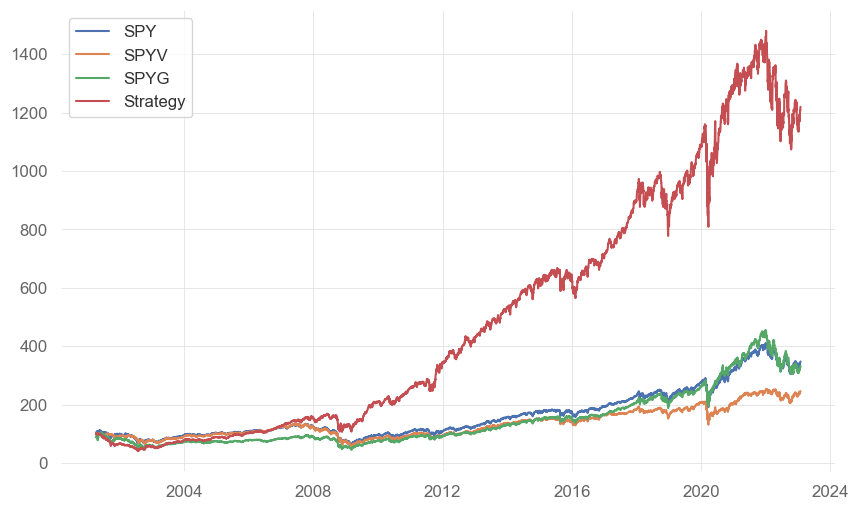

In [4]:
plt.plot(spy_investment, label='SPY')
plt.plot(spyv_investment, label='SPYV')
plt.plot(spyg_investment, label='SPYG')
plt.plot(strategy_investment, label='Strategy')
plt.legend()
plt.show()
